Descripcion del Data set:

"All the cards from your popular trading card game Yu-Gi-Oh.

Information downloaded from https://ygoprodeck.com/ via its API.

The literal and graphical information presented on this dataset Yu-Gi-Oh!, including card images, the attribute, level/rank and type symbols, and card text, is copyright of 4K Media Inc, a subsidiary of Konami Digital Entertainment, Inc."



In [65]:
import pandas as pd
from PIL import Image
import requests
from io import BytesIO



url = 'https://github.com/Nemo-sop/DataSets/blob/main/YuGiOh%20Cards.csv?raw=true'

df = pd.read_csv(url,index_col=0)

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)

print("Cantidad de columnas:   "+str(df.shape[1]))
print("Cantidad de filas:      "+str(df.shape[0]))
print(df.describe())
df.columns

Cantidad de columnas:   17
Cantidad de filas:      11183
               atk          def        level       scale     linkval
count  7386.000000  7057.000000  7056.000000  278.000000  329.000000
mean   1464.067154  1224.629446     4.500709    4.381295    2.382979
std     936.016771   850.984762     2.339989    2.806377    0.939877
min       0.000000     0.000000     0.000000    0.000000    1.000000
25%     800.000000   500.000000     3.000000    2.000000    2.000000
50%    1500.000000  1200.000000     4.000000    4.000000    2.000000
75%    2100.000000  1800.000000     6.000000    7.000000    3.000000
max    5000.000000  5000.000000    13.000000   13.000000    6.000000


Index(['name', 'type', 'desc', 'atk', 'def', 'level', 'race', 'attribute',
       'scale', 'archetype', 'linkval', 'linkmarkers', 'image_url',
       'image_url_small', 'ban_tcg', 'ban_ocg', 'ban_goat'],
      dtype='object')

In [19]:
# Determinar cuantas cartas hay
total = df["name"].unique().shape[0]
total

11183

In [22]:
# Exploramos los tipos de cartas que hay
tiposDeCartas = df["type"].unique()
tiposDeCartas

array(['Spell Card', 'Effect Monster', 'Normal Monster',
       'Flip Effect Monster', 'Trap Card', 'Union Effect Monster',
       'Fusion Monster', 'Pendulum Effect Monster', 'Link Monster',
       'XYZ Monster', 'Synchro Tuner Monster', 'Tuner Monster',
       'Synchro Monster', 'Gemini Monster', 'Normal Tuner Monster',
       'Spirit Monster', 'Ritual Effect Monster', 'Token', 'Skill Card',
       'Ritual Monster', 'Toon Monster', 'Pendulum Normal Monster',
       'Synchro Pendulum Effect Monster', 'Pendulum Tuner Effect Monster',
       'XYZ Pendulum Effect Monster', 'Pendulum Effect Fusion Monster',
       'Pendulum Flip Effect Monster'], dtype=object)

In [53]:
# cambiamos el nombre de la coolumna type a tipo ya que nos trae errores
df.rename(columns = {'type':'tipo'}, inplace = True)

# Mostramos cuantas cartas hay de cada tipo y el porcentaje sobre el total
for i in tiposDeCartas:
  cantidad = df[df.tipo == i ].shape[0]
  print(f"Cantidad de cartas tipo {i}: {cantidad} ({round(cantidad/total*100,2)}%)")

Cantidad de cartas tipo Spell Card: 2089 (18.68%)
Cantidad de cartas tipo Effect Monster: 4077 (36.46%)
Cantidad de cartas tipo Normal Monster: 653 (5.84%)
Cantidad de cartas tipo Flip Effect Monster: 170 (1.52%)
Cantidad de cartas tipo Trap Card: 1638 (14.65%)
Cantidad de cartas tipo Union Effect Monster: 36 (0.32%)
Cantidad de cartas tipo Fusion Monster: 371 (3.32%)
Cantidad de cartas tipo Pendulum Effect Monster: 215 (1.92%)
Cantidad de cartas tipo Link Monster: 329 (2.94%)
Cantidad de cartas tipo XYZ Monster: 432 (3.86%)
Cantidad de cartas tipo Synchro Tuner Monster: 22 (0.2%)
Cantidad de cartas tipo Tuner Monster: 371 (3.32%)
Cantidad de cartas tipo Synchro Monster: 337 (3.01%)
Cantidad de cartas tipo Gemini Monster: 43 (0.38%)
Cantidad de cartas tipo Normal Tuner Monster: 10 (0.09%)
Cantidad de cartas tipo Spirit Monster: 30 (0.27%)
Cantidad de cartas tipo Ritual Effect Monster: 89 (0.8%)
Cantidad de cartas tipo Token: 107 (0.96%)
Cantidad de cartas tipo Skill Card: 70 (0.63%)
Ca

['Cyberdark End Dragon' 'Dragon Master Knight' 'Dystopia the Despondent'
 'Five-Headed Dragon' 'Five-Headed Link Dragon'
 'Flower Cardian Lightflare' 'Malefic Truth Dragon' 'Rocket Arrow Express'
 'Superdimensional Robot Galaxy Destroyer']


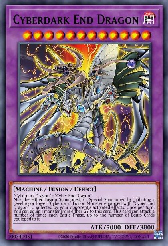

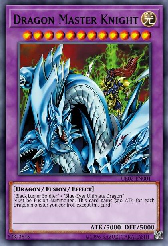

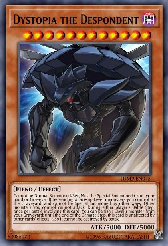

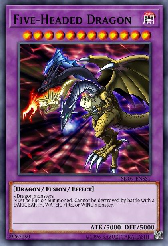

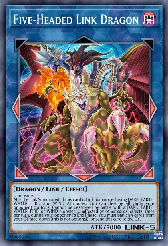

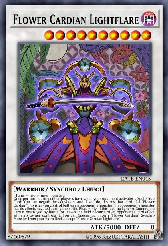

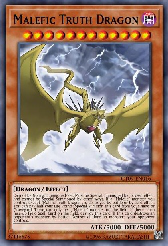

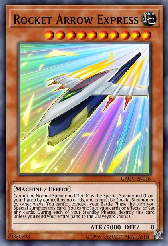

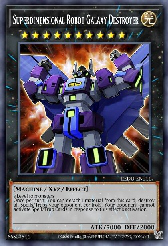

In [71]:
# Determinamos cuales cartas poseen el ataque base mas alto del juego (5000 pts de atk)
cantCartasAltas = df[df.atk == 5000].shape[0]
cartasAltas = df[df.atk == 5000]["name"].unique()
print(f"{cartasAltas}")
for i in cartasAltas:
  html = df[df.name == i]["image_url_small"].unique()[0]
  #print(html)
  response = requests.get(html)
  img = Image.open(BytesIO(response.content))
  display(img)
  print("\n")

In [56]:
# Determinamos los porcentajes de las razas de los 'Normal Monster' (tener en cuenta de ejecutar la celda que efectua el cambio de type a tipo)
print(df[df.tipo == 'Normal Monster']["race"].value_counts())

Fiend            69
Warrior          64
Aqua             56
Machine          55
Spellcaster      49
Beast            48
Dragon           36
Fairy            32
Insect           29
Zombie           28
Rock             27
Winged Beast     23
Plant            22
Beast-Warrior    19
Reptile          18
Pyro             18
Fish             17
Dinosaur         15
Thunder          10
Sea Serpent       7
Cyberse           5
Psychic           3
Wyrm              3
Name: race, dtype: int64
